## Trabalho T1 sobre Erros e Zeros de Funções

### Métodos Numéricos Computacionais
### UFSM - 2º Semestre de 2023

**Nome dos componentes do grupo:**
Augusto Kist Lunardi,
Felipe da Cas Becker e 
Jonathan Weber Nogueira

**Questão 1:**

A série de Maclaurin para a função arco-tangente converge para $-1<x \leq 1$ e é determinada por

$$
\operatorname{arctg} x=\lim _{n \rightarrow \infty} P_n(x)=\lim _{n \rightarrow \infty} \sum_{i=1}^n(-1)^{i+1} \frac{x^{2 i-1}}{2 i-1} .
$$

**a.** Use $o$ fato de que $\operatorname{tg} \pi / 4=1$ para determinar o número $n$ de termos da série que precisam ser somados para garantir que $\left|4 P_n(1)-\pi\right|<10^{-3}$.

**b.** A linguagem de programação $\mathrm{C}++$ exige que o valor de $\pi$ seja conhecido com precisão de $10^{-10}$. Quantos termos da série seriam necessários somar para obter essa ordem de precisão?

**c.** O método mostrado acima pode ser substancialmente melhorado observando que $\pi / 4=\operatorname{arctg} \frac{1}{2}+\operatorname{arctg} \frac{1}{3}$ e calculando a série para o arco-tangente em $\frac{1}{2}$ e em $\frac{1}{3}$. Determine o número de termos que devem ser somados para garantir uma aproximação de $\pi$ com precisão de $10^{-3}$.

**a.**

In [2]:
import math 

x,i = 0,0
while abs(4*x - math.pi) >= 1e-3:
    i+=1
    x += ((-1)**(i+1))*(1**(2*i-1))/(2*i-1)
print(i,"termos")

1000 termos


**b.**

In [ ]:
import math

x,i = 0,0
while abs(x - math.pi) >= 1e-10:
    i+=1
    x += ((-1)**(i+1))*(1**(2*i-1))/(2*i-1)
print(i)
# Não há como obter essa precisão nesse caso

**c.**

In [3]:
import math 

x,i = 0,0
while abs(4*x - math.pi) >= 1e-3:
    i+=1
    x += ((-1)**(i+1))*((1/2)**(2*i-1))/(2*i-1) + ((-1)**(i+1))*((1/3)**(2*i-1))/(2*i-1)
print(i,"termos")

4 termos


**Questão 2:** A sequência $\left\{F_n\right\}$, descrita por $F_0=1, F_1=1$ e $F_{n+2}=F_n+F_{n+1}$ se $n \geq 0$, é chamada *sequência de Fibonacci*. 

**a** Considere a sequência $\left\{x_n\right\}$, onde $x_n=F_{n+1} / F_n$. Verifique numéricamente que para valores cada vez maiores de $n$ a sequência parece se aproximar cada vex mais do número $x=(1+\sqrt{5}) / 2$. Que número é esse?


**b.** Verifique numericamente que o mesmo resultado pode ser obtido por 

$$
\tilde{F}_n=\frac{1}{\sqrt{5}}\left[\left(\frac{1+\sqrt{5}}{2}\right)^n-\left(\frac{1-\sqrt{5}}{2}\right)^n\right] .
$$

In [4]:
#    O número que a fração se aproxima é o número da razão áurea, phi, que está presente nos mais variados padrões na natureza.

import math

raiz = math.sqrt(5)
phi = (1+raiz)/2

def fibonacci(x1,x2):
    n,div = 2, x2/x1
    while div != phi:
        n +=1
        aux = x2
        x2 += x1 
        x1 = aux
        div = x2/x1
    return n

def verificação(x1, x2):
    n, div = 2, x2/x1
    while div != phi:
        n +=1
        aux = x2
        x2 += x1 
        x1 = aux
        div = x2/x1
    return (((1+raiz)/2)**n - ((1-raiz)/2)**n)/raiz/((((1+raiz)/2)**(n-1) - ((1-raiz)/2)**(n-1))/raiz), n
    

x1,x2 = 1,1 
n = fibonacci(x1,x2)                # Quantidade de termos para que a divisão seja próxima de phi
n2, n3 = verificação (x1, x2)       # Substituição para verificar se o método obtem o mesmo valor
print("Valor de N:" ,n)
print("Verificação do resultado", round(n2,5), "com", n3, "iterações")

Valor de N: 41
Verificação do resultado 1.61803 com 41 iterações


**Questão 3.** Utilize o método da bisseção, o método do ponto fixo (se possível), o método de Newton e das secantes para determinar todas as soluções das equações abaixo com precisão de $10^{-5}$:

**a.** $x^2-4 x+4-\ln x=0 \quad$ 

**b.** $x+1-2 \operatorname{sen} \pi x=0 \quad$  

**c.** $3 x^2-e^x=0$

Para cada uma das equações faça um gráfico com as curvas *erro $\times$ iteração* de cada método utilizado. Comente os resultados que você obteve. 

**a.**

Método da Bisseção:   3.05711
Método do Ponto Fixo: 1.41238
Método de Newton:     1.41239
Método das Secantes:  3.0571


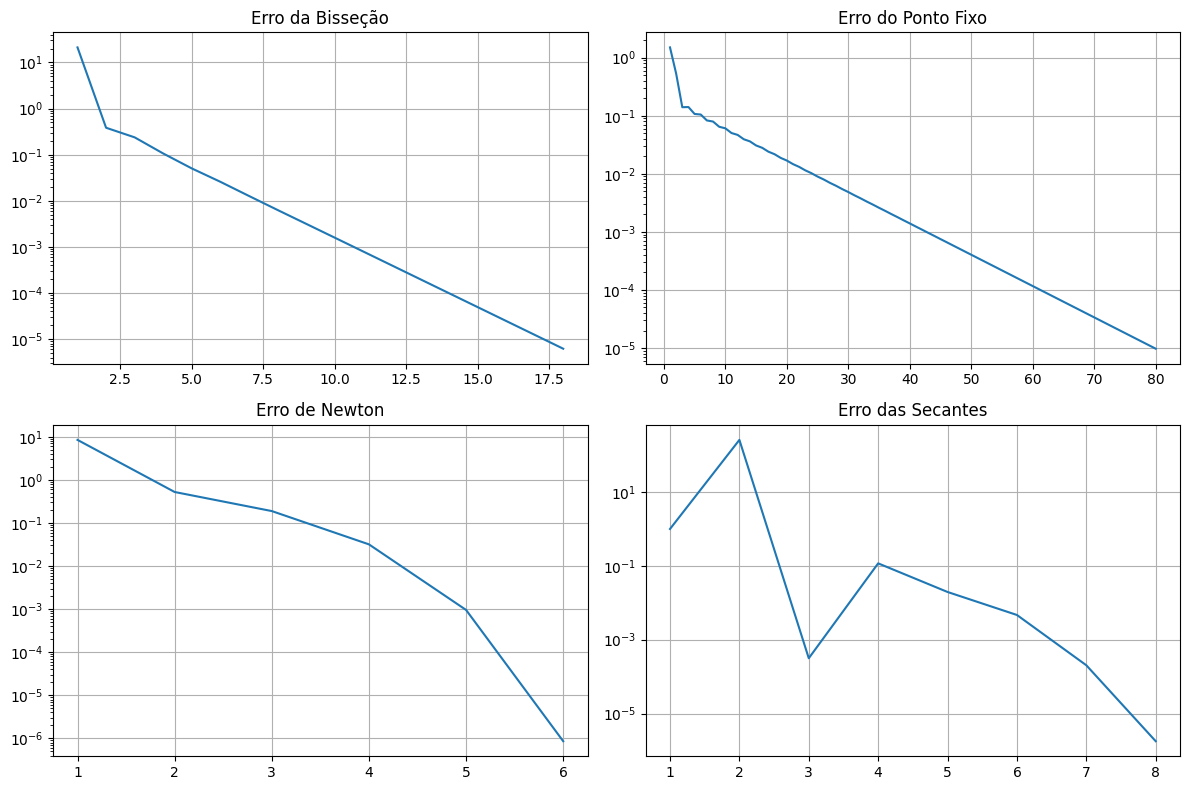

In [5]:
import math
import matplotlib.pyplot as plt

def f(x):
    return x**2 -4*x+4-math.log(x)

def fp(x):
    return x**2 -3*x+4-math.log(x)

def fn(x):  
    return x - (x**2 - 4*x + 4 - math.log(x))/(2*x - 4 - 1/x) 

def bissecao():
    a,b = 2 , 7
    e,error = 1e-5,1
    xant = 100
    i = 0
    erro_bi = []
    while error>e:
        i+=1
        x = (a+b)/2
        if f(x)*f(a)<0:
            b = x
        else:
            a = x
        error = abs(x-xant)/abs(x) 
        xant = x
        erro_bi.append(error)
    return x, erro_bi

def ponto_fixo():
    x,xant = 1,5
    e, error = 1e-5,1
    i = 0
    erro_pf = []
    while error>e:
        i+=1
        x = fp(x)
        error = abs(x-xant)/abs(x)
        xant = x
        erro_pf.append(error)
    return x, erro_pf

def newton():
    x,xant = 0.1,5
    e,error = 1e-5,5
    i = 0
    erro_new = []
    while error > e:
        i+=1
        x = fn(x)
        error = abs(x-xant)/abs(x)
        xant = x
        erro_new.append(error)
    return x, erro_new

def secante():
    x0,x1 = 1,3.5
    e = 1e-5
    i = 0
    erro_sec = []
    while True:
        i+=1
        x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
        error = abs(x2 - x1)/abs(x2)
        erro_sec.append(error)
        if error < e:
            return x2, erro_sec
        x0 = x1
        x1 = x2

x1, erro_bi = bissecao()
x2, erro_pf = ponto_fixo()
x3, erro_new = newton()
x4, erro_sec = secante()

print("Método da Bisseção:  ",round(x1,5))
print("Método do Ponto Fixo:",round(x2,5))
print("Método de Newton:    ",round(x3,5))
print("Método das Secantes: ",round(x4,5))

# Plotagem dos gráficos separados
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(erro_bi) + 1), erro_bi)
plt.yscale('log')
plt.title('Erro da Bisseção')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, len(erro_pf) + 1), erro_pf)
plt.yscale('log')
plt.title('Erro do Ponto Fixo')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, len(erro_new) + 1), erro_new)
plt.yscale('log')
plt.title('Erro de Newton')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, len(erro_sec) + 1), erro_sec)
plt.yscale('log')
plt.title('Erro das Secantes')
plt.grid(True)

plt.tight_layout()
plt.show()

**b.**

Método da Bisseção 1: -2.68196
Método da Bisseção 2: 0.20603
Método do Ponto Fixo: -1.0
Método de Newton:     0.68197
Método das Secantes:  -2.20604


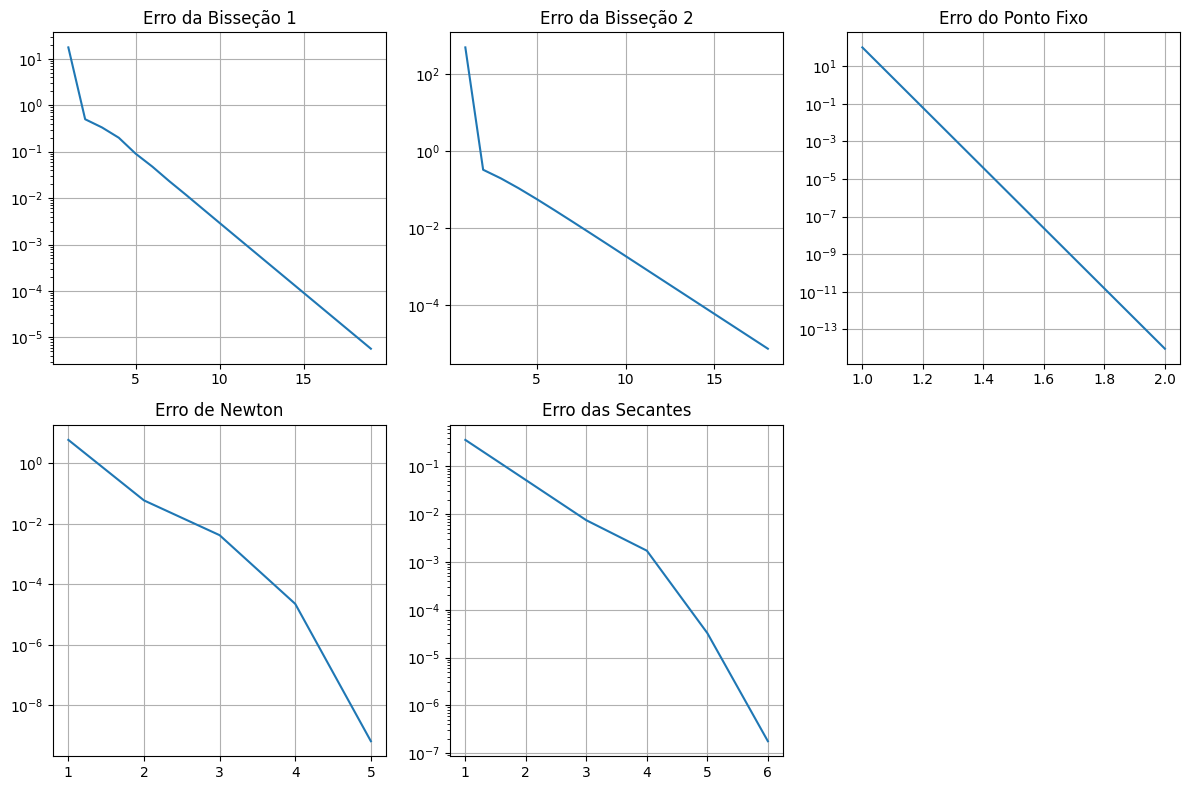

In [6]:
import math

def f(x):
    return x+1-2*math.sin(math.pi*x)

def fp(x):
    return 2*math.sin(math.pi*x)-1

def fn(x):
    return x - (x+1-2*math.sin(math.pi*x))/(1-2*math.pi*math.cos(math.pi*x))

# Como a f(x) possui 5 raizes, foi utilizado o método da bisseção 2 vezes
def bissecao1():     
    a,b = -10 , -2
    e,error = 1e-5,1
    xant = 100
    i = 0
    erro_bi1 = []
    while error>e:
        i+=1
        x = (a+b)/2
        if f(x)*f(a)<0:
            b = x
        else:
            a = x
        error = abs(x-xant)/abs(x) 
        xant = x
        erro_bi1.append(error)
    return x, erro_bi1

def bissecao2():
    a,b = 0.01 , 0.4
    e,error = 1e-5,1
    xant = 100
    i = 0
    erro_bi2 = []
    while error>e:
        i+=1
        x = (a+b)/2
        if f(x)*f(a)<0:
            b = x
        else:
            a = x
        error = abs(x-xant)/abs(x) 
        xant = x
        erro_bi2.append(error)
    return x, erro_bi2

def ponto_fixo():
    x,xant = 5,100
    e,error = 1e-5,1
    i = 0
    erro_pf = []
    while error>e:
        i+=1
        x = fp(x)
        error = abs(x-xant)/abs(x)
        xant = x
        erro_pf.append(error)
    return x, erro_pf

def newton():
    x,xant = 1,5
    e,error = 1e-5,5
    i = 0
    erro_new = []
    while error > e:
        i+=1
        x = fn(x)
        error = abs(x-xant)/abs(x)
        xant = x
        erro_new.append(error)
    return x, erro_new

def secante():
    x0,x1 = -2,-1.5
    e = 1e-5
    i = 0
    erro_sec = []
    while True:
        i+=1
        x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
        error = abs(x2 - x1)/abs(x2)
        erro_sec.append(error)
        if error < e:
            return x2, erro_sec
        x0 = x1
        x1 = x2



x1, erro_bi1 = bissecao1()
x2, erro_bi2 = bissecao2()
x3, erro_pf = ponto_fixo()
x4, erro_new = newton()
x5, erro_sec = secante()

print("Método da Bisseção 1:",round(x1,5))
print("Método da Bisseção 2:",round(x2,5))
print("Método do Ponto Fixo:",round(x3,5))
print("Método de Newton:    ",round(x4,5))
print("Método das Secantes: ",round(x5,5))

# Plotagem dos gráficos separados
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(range(1, len(erro_bi1) + 1), erro_bi1)
plt.yscale('log')
plt.title('Erro da Bisseção 1')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(range(1, len(erro_bi2) + 1), erro_bi2)
plt.yscale('log')
plt.title('Erro da Bisseção 2')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(range(1, len(erro_pf) + 1), erro_pf)
plt.yscale('log')
plt.title('Erro do Ponto Fixo')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(range(1, len(erro_new) + 1), erro_new)
plt.yscale('log')
plt.title('Erro de Newton')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(range(1, len(erro_sec) + 1), erro_sec)
plt.yscale('log')
plt.title('Erro das Secantes')
plt.grid(True)

plt.tight_layout()
plt.show()

**c.**

Método da Bisseção:   -0.45896
Método do Ponto Fixo: 0.91
Método de Newton:     -0.45896
Método das Secantes:  3.73308


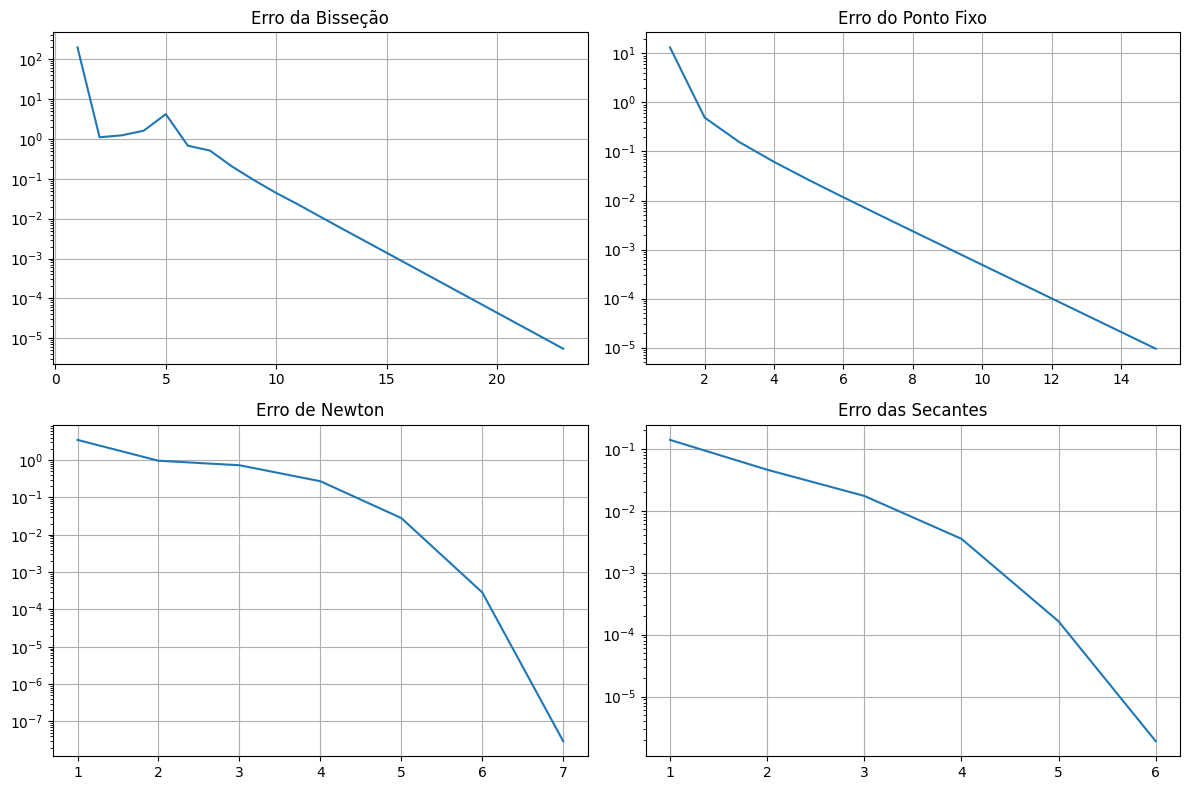

In [17]:
import math
import matplotlib.pyplot as plt

def f(x):
    return 3*x**2 - math.e**x

def fp(x):
    return math.sqrt((math.e**x)/3)

def fn(x):
    return x - (3*x**2 - math.e**x)/(6*x - math.e**x)

def bissecao():
    a,b = -10 , 11
    e,error = 1e-5,1
    xant = 100
    i = 0
    erro_bi = []
    while error>e:
        i+=1
        x = (a+b)/2
        if f(x)*f(a)<0:
            b = x
        else:
            a = x
        error = abs(x-xant)/abs(x) 
        xant = x
        erro_bi.append(error)
    return x,erro_bi

def ponto_fixo():
    x,xant = -1,5
    e,error = 1e-5,1
    i = 0
    erro_pf = []
    while error>e:
        i+=1
        x = fp(x)
        error = abs(x-xant)/abs(x)
        xant = x
        erro_pf.append(error)
    return x,erro_pf

def newton():
    x,xant = 0.1,5
    e,error = 1e-5,5
    i = 0
    erro_new = []
    while error > e:
        i+=1
        x = fn(x)
        error = abs(x-xant)/abs(x)
        xant = x
        erro_new.append(error)
    return x,erro_new

def secante():
    x0,x1 = 3,4
    e = 1e-5
    i = 0
    erro_sec = []
    while True:
        i+=1
        x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
        error = abs(x2 - x1)/abs(x2)
        erro_sec.append(error)
        if error < e:
            return x2,erro_sec
        x0 = x1
        x1 = x2


x1, erro_bi = bissecao()
x2, erro_pf = ponto_fixo()
x3, erro_new = newton()
x4, erro_sec = secante()

print("Método da Bisseção:  ",round(x1,5))
print("Método do Ponto Fixo:",round(x2,5))
print("Método de Newton:    ",round(x3,5))
print("Método das Secantes: ",round(x4,5))

# Plotagem dos gráficos separados
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(erro_bi) + 1), erro_bi)
plt.yscale('log')
plt.title('Erro da Bisseção')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, len(erro_pf) + 1), erro_pf)
plt.yscale('log')
plt.title('Erro do Ponto Fixo')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, len(erro_new) + 1), erro_new)
plt.yscale('log')
plt.title('Erro de Newton')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, len(erro_sec) + 1), erro_sec)
plt.yscale('log')
plt.title('Erro das Secantes')
plt.grid(True)

plt.tight_layout()
plt.show()

**Comentários**

Com base nesses gráficos, é notável a superioridade do método de newton, sempre necessitando poucas iterações para encontrar a raiz da função. O método das secantes também é muito eficiente para encontrar as raizes.

O método da bisseção e ponto fixo se mostraram pouco otimizados, pois possuem altos números de iteração, porém o metódo da bisseção é mais "constante", de modo que sempre será uma busca bínaria independente da função. Já o método do ponto fixo depende da função, podendo ser rápido para certas funções (como no caso b) e muito demorado para outros casos (como no caso a).


**Questão 4:** Um objeto em queda vertical no ar está sujeito à resistência viscosa, bem como à força da gravidade. Suponha que um objeto com massa $m$ seja solto a uma altura $s_0$ e que a altura do objeto após $t$ segundos seja
$$
s(t)=s_0-\frac{m g}{k} t+\frac{m^2 g}{k^2}\left(1-e^{-k t / m}\right),
$$
onde $g=32,17$ pés $/ \mathrm{s}^2$ e $k$ representa o coeficiente de resistência do ar em lb-s/pé. Suponha que $s_0=300$ pés, $m=0,25$ lb e $k=0,1$ lb-s/pé. Determine, com precisão de $0,01$ s, o tempo decorrido até que o objeto alcance o solo. Use o de sua escolha.

In [9]:
import math

s0 = 300
g = 32.17
m = 0.25
k = 0.1

def f(t):
    return s0 - m*g*t/k + ((g*m**2)/(k**2))*(1 - math.e**(-k*t/m))

# Método da Bisseção
a = 0
b = 10
e = 1e-2
error = 1
tant = 10
while error>e:
    t = (a+b)/2
    if f(t)*f(b)<0:
        a = t
    else:
        b = t
    error = abs(t-tant)/abs(t) 
    tant = t
print(t)

5.9765625


**Questão 5:** Uma partícula começa a se movimentar sobre um plano inclinado liso cujo ângulo $\theta$ está variando com velocidade constante

$$
\frac{d \theta}{d t}=\omega<0
$$

Depois de $t$ segundos, a posição do objeto é dada por

$$
x(t)=-\frac{g}{2 \omega^2}\left(\frac{e^{\omega t}-e^{-\omega t}}{2}-\operatorname{sen} \omega t\right) .
$$

Suponha que a partícula tenha se deslocado $52$ cm em $1$ segundo. Determine, com precisão de $10^{-5}$, a velocidade $\omega \operatorname{com}$ a qual $\theta$ varia. Suponha que $g=9,8 \mathrm{m} / \mathrm{s}^2$. Use o método que preferir e justifique sua escolha.  


In [7]:
import math

# Foi utilizado o método da bisseção pelo fato de que a função é muito "complicada" para utilizar os 
# outros métodos, além de que, por ser uma busca binária, o método da bisseção possui complexidade log(n)
def f(w):
    return -0.52+(-9.8/(2.0*w*w))*(((math.e**w)-(math.e**(-w)))/2 - math.sin(w))

e,error = 1e-5,1
a,b = -0.1,-2
xant = 10
while(error > e):
    x = (a+b)/2
    if(f(a)*f(x)<0):
        b = x
    else:
        a = x
    error = abs(x-xant)/abs(x)
    xant = x
print(round(x,5))

-0.31836
